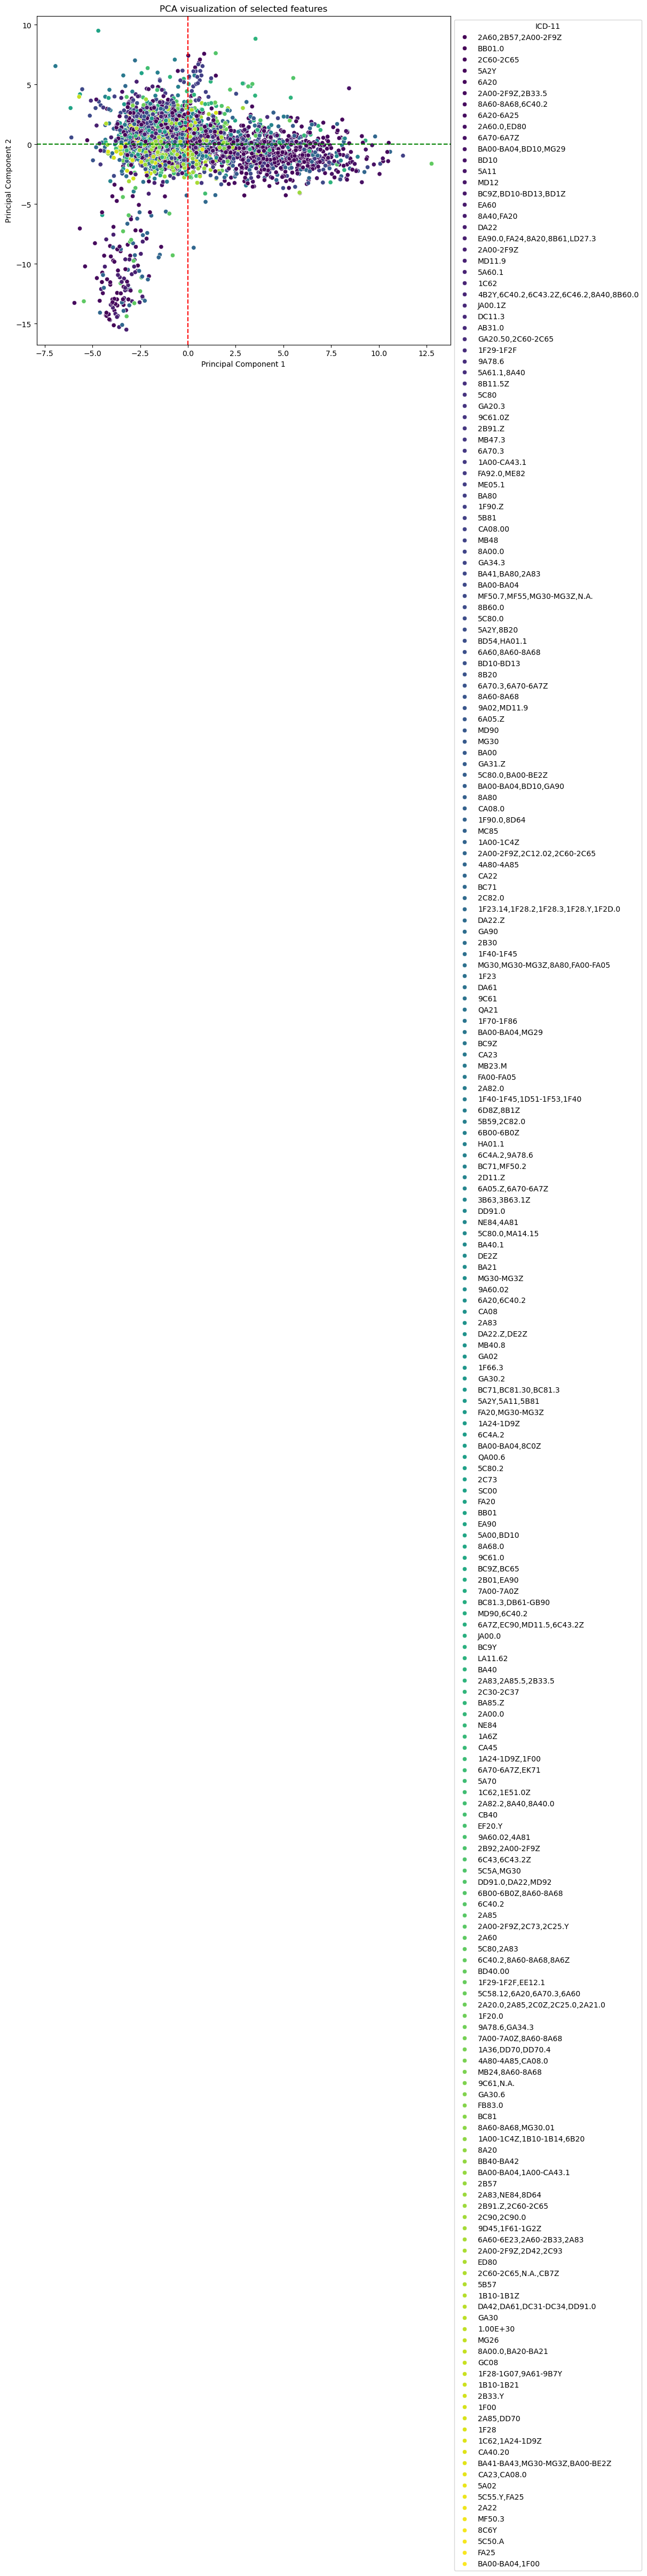

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import re  # For regular expressions

# Load the data
df = pd.read_csv('/data4/msc23104470/version1_data-matrix-TTD-w-HUGO-symbols-ICD-11_RD.csv')

# Function to extract the pattern 'BRD- followed by 9 alphanumeric characters'
def extract_brd_pattern(text):
    match = re.search(r'BRD-\w{9}', text)
    return match.group(0) if match else None

# Apply the function to the first column ('rid') and create a new column ('BRD') with the extracted patterns
df['BRD'] = df['rid'].apply(extract_brd_pattern)

# Separate features and target
X = df.iloc[:, 1:-2]  # Exclude 'rid', 'ICD-11' and 'BRD' columns
y = df['ICD-11']          # Use 'BRD' column as the target labels

# Apply VarianceThreshold to select features with variance above a threshold
selector = VarianceThreshold(threshold=0.001)
X_selected = selector.fit_transform(X)

# Scale the selected features before applying PCA
X_selected_scaled = (X_selected - X_selected.mean(axis=0)) / X_selected.std(axis=0)

# Initialize PCA with 'mle'
pca = PCA(n_components='mle', svd_solver='full')

# Fit and transform the scaled features
X_pca = pca.fit_transform(X_selected_scaled)

# Convert the PCA results into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add 'BRD' labels to the PCA dataframe
pca_df['ICD-11'] = y.values

# Plot PCA results
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette='viridis', hue='ICD-11')

plt.title('PCA visualization of selected features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding vertical and horizontal lines
plt.axvline(x=0, color='r', linestyle='--')  # Vertical line at x=0
plt.axhline(y=0, color='g', linestyle='--')  # Horizontal line at y=0

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()